In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Variable Delay Branch
k_variable_holders = []

with h5.File("C:/Users/haoyuan/Desktop/Research/Projects/Split Delay Design/instability_inclined_2.h5", 'r') as source:
    name_list = list(source.keys())
    for k in list(source.keys()):
        print(k)
        k_variable_holders.append(np.array(source[k]))
        #print(source[k].shape)

# ===============================================================================================================
k_fixed_holders = []

with h5.File("C:/Users/haoyuan/Desktop/Research/Projects/Split Delay Design/instability_fixed.h5", 'r') as source:
    for k in list(source.keys()):
        #print(k)
        k_fixed_holders.append(np.array(source[k]))
        #print(source[k].shape)


crystal 0 x axis
crystal 0 y axis
crystal 0 z axis
crystal 1 x axis
crystal 1 y axis
crystal 1 z axis


# Get the unperturbed wave vector

In [3]:
k0_fix = k_fixed_holders[0][100]
print(k0_fix)

k0_var = k_variable_holders[0][100]
print(k0_var)

[ 0.00000000e+00 -1.29034561e-11  5.06773076e+04]
[1.48662843e-07 8.97680939e-07 5.06773076e+04]


# Calculate the momentum difference

In [4]:
k_fix = np.stack(k_fixed_holders)
k_fix_diff = k_fix - k0_fix[np.newaxis, np.newaxis, :]

k_var = np.stack(k_variable_holders)
k_var_diff = k_var - k0_var[np.newaxis, np.newaxis, :]

# plot the differences

# Fit the Deviation Matrix

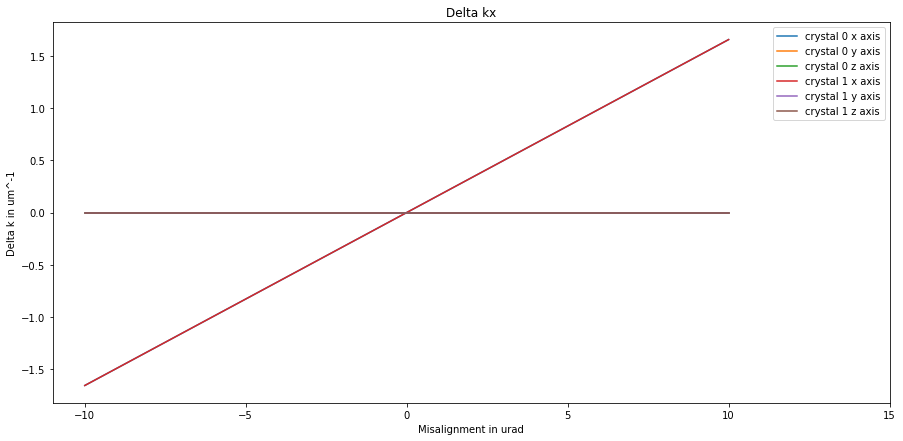

In [5]:
plt.figure(figsize=(15, 7))

for x in range(6):
    plt.plot(np.arange(-100, 101) / 10., k_var_diff[x, :, 0] / k0_var[-1] * 1e6, label=name_list[x])

plt.xlim([-11, 15])

plt.ylabel("Delta k in um^-1")
plt.xlabel("Misalignment in urad")
plt.title("Delta kx")

plt.legend()
plt.show()

In [6]:
gradient_fix_holder = np.zeros((3, 18))

angles = np.arange(-100, 101) / 10.  # urad

for x in range(18):
    for y in range(3):
        
        # Linear fit slope
        slope, intercept, r_value, p_value, std_err = linregress(angles, k_fix_diff[x, :, y])

        # Slope through the origin
        slope_o = np.dot(angles, k_fix_diff[x, :, y]) / np.dot(angles, angles)
        
        #print(slope - slope_o)
        
        gradient_fix_holder[y, x] = slope_o

In [8]:
gradient_var_holder = np.zeros((3, 6))

angles = np.arange(-100, 101) / 10.  # urad

for x in range(6):
    for y in range(3):
        
        # Linear fit slope
        slope, intercept, r_value, p_value, std_err = linregress(angles, k_var_diff[x, :, y])

        # Slope through the origin
        slope_o = np.dot(angles, k_var_diff[x, :, y]) / np.dot(angles, angles)
        
        #print(slope - slope_o)
        
        gradient_var_holder[y, x] = slope_o

In [9]:
print(gradient_var_holder.T)

[[ 8.39244032e-03 -1.37791948e-07  4.12530776e-11]
 [ 5.96862396e-31  4.77489917e-31  0.00000000e+00]
 [-1.08983900e-08  1.22032355e-13 -1.92462895e-14]
 [ 8.39246593e-03  1.68445833e-08 -5.04392563e-12]
 [ 4.73584665e-35  4.77489917e-31  0.00000000e+00]
 [ 1.08984438e-08  7.67397705e-14  6.23622789e-14]]


In [10]:
print(gradient_var_holder[0,0] * 10 / k0_var[-1] * 1e6)

1.6560548933789847
